### Replication : Long Call ATM

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from configuration import ConfigurationBuilder
from pricing import BlackScholesMerton, GeometricBrownianMotion

In [2]:
configuration = ConfigurationBuilder(
    kind='call',
    spot=100,
    strike=100,
    sigma=0.20,
    maturity=252,
    risk_free_rate=0,
    dividend_yield=0,
)

#### With Black Scholes Merton

In [3]:
call = BlackScholesMerton(configuration)

In [4]:
print('price', abs(call.price()))
print('delta', call.delta())
print('gamma', call.gamma())
print('vega', call.vega())
print('theta', call.theta())
print('rho', call.rho())

price 7.965567455405804
delta 0.539827837277029
gamma 0.01984762737385059
vega 0.3969525474770118
theta -0.015752085217341737
rho 0.460172162722971


#### With Geometric Brownian Motion

In [5]:
configuration.simulation = 10000
configuration.steps = 252
gbm_pricing = GeometricBrownianMotion(configuration)
gbm_pricing.run_simulation()

In [6]:
gbm_pricing.price()

7.945244585941744

### Sensitivity : Long Call

In [7]:
data = []

for maturity, sigma in ((252, 0.2), (252, 0.05), (126, 0.20)):
    for spot in range(10, 190):
        
        # Configuration ---------------------------
        
        configuration.maturity = maturity
        configuration.sigma = sigma
        configuration.spot = spot

        # Option  -----------------------------------

        call = BlackScholesMerton(configuration)

        # Retrieve Result ---------------------------

        data.append({"spot": spot,
                     "maturity": maturity,
                     "sigma": sigma,
                     "price": abs(call.price()),
                     "delta": call.delta(),
                     "gamma": call.gamma(),
                     "vega": call.vega(),
                     "theta": call.theta(),
                     "rho": call.rho()})

# Reshape data ----------------------------------------

data = pd.DataFrame(data)
reference = data[(data["maturity"]==252) & (data["sigma"]==0.2)].set_index("spot")
short_sigma = data[(data["maturity"]==252) & (data["sigma"]==0.05)].set_index("spot")
short_maturity = data[(data["maturity"]==126) & (data["sigma"]==0.20)].set_index("spot")

In [8]:
price = pd.DataFrame()
price["sigma  20 maturity  252"] = reference["price"]
price["sigma  5 maturity  252"] = short_sigma["price"]
price["sigma  20 maturity  126"] = short_maturity["price"]

delta = pd.DataFrame()
delta["sigma  20 maturity  252"] = reference["delta"]
delta["sigma  5 maturity  252"] = short_sigma["delta"]
delta["sigma  20 maturity  126"] = short_maturity["delta"]

gamma = pd.DataFrame()
gamma["sigma  20 maturity  252"] = reference["gamma"]
gamma["sigma  5 maturity  252"] = short_sigma["gamma"]
gamma["sigma  20 maturity  126"] = short_maturity["gamma"]

vega = pd.DataFrame()
vega["sigma  20 maturity  252"] = reference["vega"]
vega["sigma  5 maturity  252"] = short_sigma["vega"]
vega["sigma  20 maturity  126"] = short_maturity["vega"]

theta = pd.DataFrame()
theta["sigma  20 maturity  252"] = reference["theta"]
theta["sigma  5 maturity  252"] = short_sigma["theta"]
theta["sigma  20 maturity  126"] = short_maturity["theta"]

rho = pd.DataFrame()
rho["sigma  20 maturity  252"] = reference["rho"]
rho["sigma  5 maturity  252"] = short_sigma["rho"]
rho["sigma  20 maturity  126"] = short_maturity["rho"]

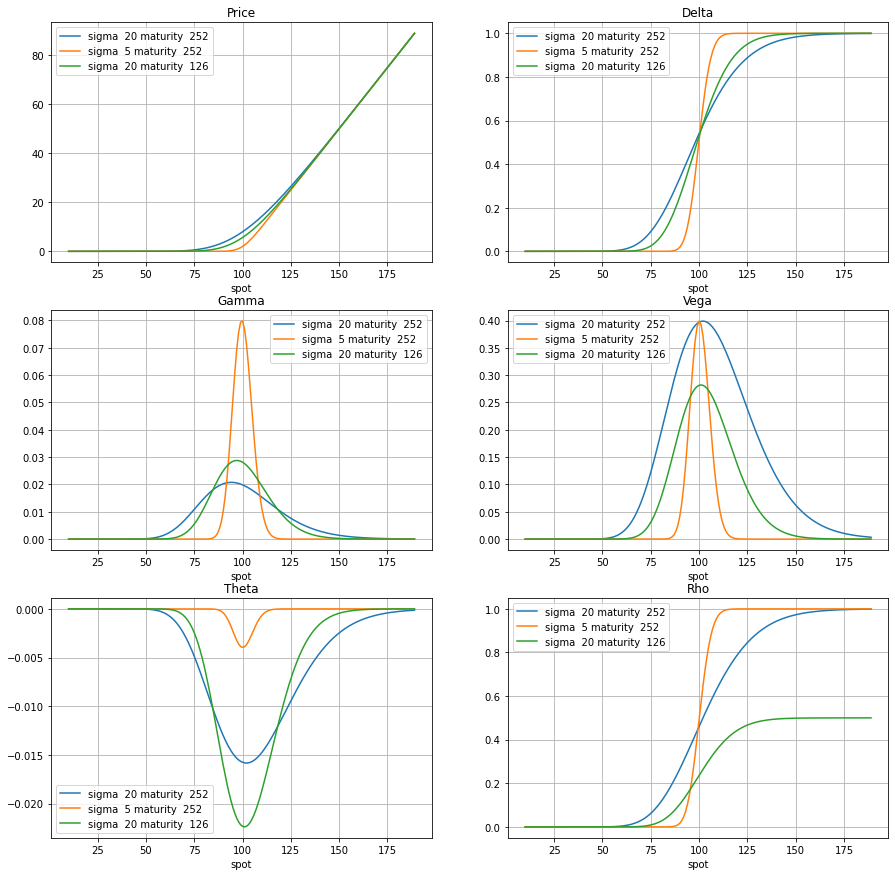

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=2)

price.plot(ax=axes[0, 0], title='Price', grid=True, legend=True)

delta.plot(ax=axes[0, 1], title='Delta', grid=True, legend=True)

gamma.plot(ax=axes[1, 0], title='Gamma', grid=True, legend=True)

vega.plot(ax=axes[1, 1], title='Vega', grid=True, legend=True)

theta.plot(ax=axes[2, 0], title='Theta', grid=True, legend=True)

rho.plot(ax=axes[2, 1], title='Rho', grid=True, legend=True)

fig.set_figheight(15)
fig.set_figwidth(15);